## Question 1

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [105]:
X, Y = make_classification(n_samples = 100,n_features=2, n_redundant = 0, n_informative=2,flip_y = 0.1,scale = 2)

In [120]:
#preparing data

df_dic = {"X1":X[:,0]
         ,"X2":X[:,1]
         ,"Y":Y}

df = pd.DataFrame(df_dic)

In [121]:
df.head()

,X1,X2,Y
0,2.530466,-0.932126,1
1,2.298602,-1.613067,1
2,-1.722616,-1.311474,0
3,2.886867,-0.345543,1
4,2.067114,3.273008,1


In [122]:
df["Y"][df["X2"] < 0] = -1

In [123]:
df.head()

,X1,X2,Y
0,2.530466,-0.932126,-1
1,2.298602,-1.613067,-1
2,-1.722616,-1.311474,-1
3,2.886867,-0.345543,-1
4,2.067114,3.273008,1


In [124]:
df["Y"].value_counts()

-1    49
 0    27
 1    24
Name: Y, dtype: int64

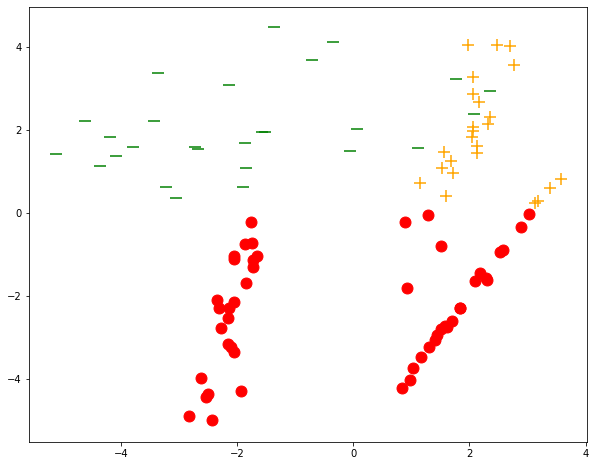

In [125]:
#visualization of data
plt.figure(figsize = (10,8))
plt.scatter(df[df["Y"] == 1]["X1"],df[df["Y"] == 1]["X2"],marker = "+",s = 150, c = "orange")
plt.scatter(df[df["Y"] == 0]["X1"],df[df["Y"] == 0]["X2"],marker = "_",s = 150,c = "g");
plt.scatter(df[df["Y"] == -1]["X1"],df[df["Y"] == -1]["X2"],marker = "o",s = 120,c = "r");

In [548]:
# CHECKING NUMBER OF CLASSES SAME OR NOT
df["Y"].value_counts()

 1    51
-1    49
Name: Y, dtype: int64

In [549]:
# initializing some parameters

learning_rate = 0.001 #learning rate

number_of_data = df.shape[0] #number of data

In [550]:
#preparing data
X = df.drop("Y",axis = 1)
Y = df["Y"].to_numpy()
Y

array([-1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1])

In [551]:
#filter function for determining -1 or 1 
def filter_(x):
    if(x >= 0):
        return 1
    else:
        return -1

## Question 2

### SEQUENTIAL MODE

In [552]:
seq_w = np.full((df.shape[1] - 1,1),0.01) #weights of sequential mode

seq_bias = 0.5 #bias term of sequential mode

seq_w_ = np.concatenate([[[seq_bias]],seq_w],axis = 0) #vector form of weights

number_of_iteration = 500

seq_acc_scores = []

In [553]:
#accuracy without training

X_ = np.c_[np.ones((X.shape[0], 1)), X.to_numpy()] 

y_head = X_.dot(seq_w_)

y_pred = np.array(list(map(filter_,y_head[0,:])))

correct_list = (y_pred == Y)

correct_size = len(correct_list[correct_list == True])

print("Accuracy without training in sequential mode = %.2f" % (correct_size/number_of_data))

Accuracy without training in sequential mode = 0.51


In [554]:
# forward propagation of sequential mode
def seq_forward_propagation(seq_w_,X_column):
    y_head = np.dot(seq_w_.T,X_column) 
    return y_head[0,0]

In [555]:
def seq_model(X, Y, learning_rate,number_of_iterarion,seq_w_):
    
    epoch = 0
    correct = 0
    j = 0 #indexes
    
    for i in range(1,number_of_iterarion + 1):
       
        column = X.to_numpy()[j,:].reshape((X.shape[1],1)) # arranging of X vector
        X_column = np.concatenate([[[1]],column],axis = 0) # arranging of X vector
        
        y_head = seq_forward_propagation(seq_w_,X_column) # results of sequential mode
       
        if (1 if y_head >= 0 else -1) == Y[j]: #comparing with orijinal results
            correct = correct + 1
            
        print ("Iteration Number = %i, Epoch Number = %i, Accuracy: %.2f " %(i, epoch + 1,(correct/i)))
        seq_acc_scores.append(correct / i)
        
        seq_w_ = seq_w_ - learning_rate * (y_head - Y[j]) * X_column #updating weights
        
        if i % 100 == 0: #updating epoch number
            epoch = epoch + 1
            j = 0
        else:
            j = j + 1
            
    return seq_acc_scores,epoch,seq_w_

In [556]:
#sequential model

seq_acc_scores,epoch,seq_w_ = seq_model(X,Y,learning_rate,number_of_iteration,seq_w_)

Iteration Number = 1, Epoch Number = 1, Accuracy: 0.00 
Iteration Number = 2, Epoch Number = 1, Accuracy: 0.50 
Iteration Number = 3, Epoch Number = 1, Accuracy: 0.67 
Iteration Number = 4, Epoch Number = 1, Accuracy: 0.75 
Iteration Number = 5, Epoch Number = 1, Accuracy: 0.60 
Iteration Number = 6, Epoch Number = 1, Accuracy: 0.50 
Iteration Number = 7, Epoch Number = 1, Accuracy: 0.57 
Iteration Number = 8, Epoch Number = 1, Accuracy: 0.50 
Iteration Number = 9, Epoch Number = 1, Accuracy: 0.56 
Iteration Number = 10, Epoch Number = 1, Accuracy: 0.60 
Iteration Number = 11, Epoch Number = 1, Accuracy: 0.64 
Iteration Number = 12, Epoch Number = 1, Accuracy: 0.67 
Iteration Number = 13, Epoch Number = 1, Accuracy: 0.62 
Iteration Number = 14, Epoch Number = 1, Accuracy: 0.64 
Iteration Number = 15, Epoch Number = 1, Accuracy: 0.67 
Iteration Number = 16, Epoch Number = 1, Accuracy: 0.69 
Iteration Number = 17, Epoch Number = 1, Accuracy: 0.65 
Iteration Number = 18, Epoch Number = 1,

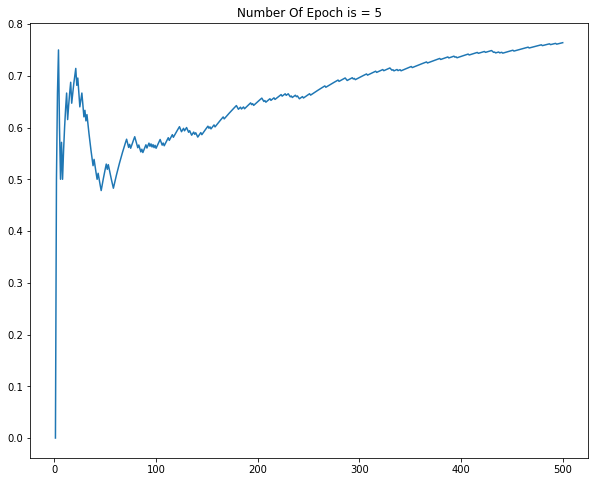

In [557]:
#visualization of sequential mode

plt.figure(figsize = (10,8))
plt.plot(np.arange(1,number_of_iteration+1),np.array(seq_acc_scores))
plt.title("Number Of Epoch is = %i"% (epoch));

## QUESTION 3

### BATCH MODE

In [558]:
batch_w = np.full((df.shape[1] - 1,1),0.001) #weights of batch mode

batch_bias = 0.05 #bias term of batch mode

batch_w_ = np.concatenate([[[batch_bias]],batch_w],axis = 0) #vector form of weights

number_of_iteration_batch = 20

batch_acc_scores = []

In [559]:
#accuracy without training

y_head_batch = X_.dot(batch_w_)

y_pred_batch = np.array(list(map(filter_,y_head_batch[0,:])))

correct_list_batch = (y_pred_batch == Y)

correct_size_batch = len(correct_list_batch[correct_list_batch == True])

print("Accuracy without training in batch mode = %.2f" % (correct_size_batch/number_of_data))

Accuracy without training in batch mode = 0.51


In [560]:
# forward propagation of batch mode

def batch_forward_propagation(batch_w_,X):
    y_head = np.dot(batch_w_.T,X) 
    return y_head

In [561]:

def batch_model(X, Y, learning_rate,number_of_iterarion_batch,batch_w_):

    epoch = number_of_iterarion_batch # we know that epoch number of batch model is equal to number_of_iterarion_batch,because we send all of the data  
    
    for i in range(1,number_of_iterarion_batch + 1):
        
        columns = X.to_numpy()[:].T #arranging of X vector
        X_columns = np.concatenate([np.ones((1,X.shape[0])),columns],axis = 0) # arranging of X vector
        
        y_head = batch_forward_propagation(batch_w_,X_columns) # results of batch mode
        y_pred = np.array(list(map(filter_,y_head[0,:]))) # filtering for compare actual result
        
        correct_list = (y_pred == Y) # comparing with actual results
        correct_size = len(correct_list[correct_list == True])
        accuracy = correct_size / number_of_data #getting accuracy
        
        batch_acc_scores.append(accuracy)
        print ("Iteration Number = %i, Epoch Number = %i, accuracy = %.2f " %(i,i,accuracy))
        batch_w_ = batch_w_ - (learning_rate * ((np.sum(y_head - Y))) * X_columns)/number_of_data #updating weights
            
    return batch_acc_scores,epoch,batch_w_


In [562]:
batch_acc_scores,epoch,batch_w_ = batch_model(X,Y,learning_rate,number_of_iteration_batch,batch_w_)

Iteration Number = 1, Epoch Number = 1, accuracy = 0.51 
Iteration Number = 2, Epoch Number = 2, accuracy = 0.51 
Iteration Number = 3, Epoch Number = 3, accuracy = 0.59 
Iteration Number = 4, Epoch Number = 4, accuracy = 0.71 
Iteration Number = 5, Epoch Number = 5, accuracy = 0.79 
Iteration Number = 6, Epoch Number = 6, accuracy = 0.81 
Iteration Number = 7, Epoch Number = 7, accuracy = 0.82 
Iteration Number = 8, Epoch Number = 8, accuracy = 0.82 
Iteration Number = 9, Epoch Number = 9, accuracy = 0.83 
Iteration Number = 10, Epoch Number = 10, accuracy = 0.84 
Iteration Number = 11, Epoch Number = 11, accuracy = 0.86 
Iteration Number = 12, Epoch Number = 12, accuracy = 0.86 
Iteration Number = 13, Epoch Number = 13, accuracy = 0.87 
Iteration Number = 14, Epoch Number = 14, accuracy = 0.87 
Iteration Number = 15, Epoch Number = 15, accuracy = 0.87 
Iteration Number = 16, Epoch Number = 16, accuracy = 0.87 
Iteration Number = 17, Epoch Number = 17, accuracy = 0.86 
Iteration Numbe

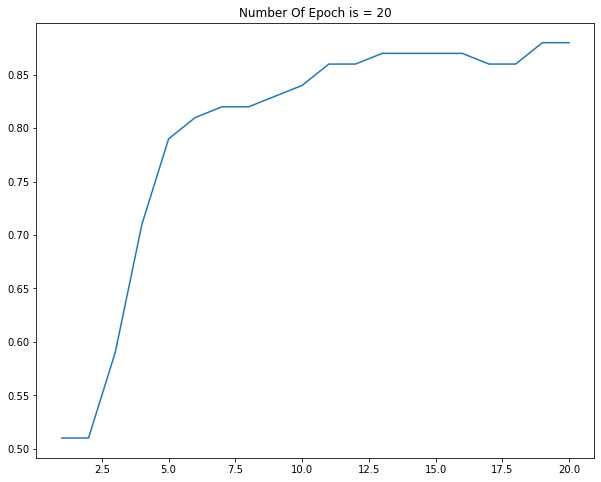

In [563]:
#visualization of batch mode
plt.figure(figsize = (10,8))
plt.plot(np.arange(1,number_of_iteration_batch+1),np.array(batch_acc_scores))
plt.title("Number Of Epoch is = %i"% (epoch));

## QUESTION 4

### MINI BATCH

In [564]:
m_batch_w = np.full((df.shape[1] - 1,1),0.0001) #weights of mini batch

m_batch_bias = 0.005 #bias term of mini batch

m_batch_w_ = np.concatenate([[[m_batch_bias]],m_batch_w],axis = 0) #vector form of weights

number_of_iteration_m = 100

batch_size = 10

m_batch_acc_scores = []

In [565]:
#accuracy without training

y_head_mbatch = X_.dot(m_batch_w_)

y_pred_mbatch = np.array(list(map(filter_,y_head_mbatch[0,:])))

correct_list_mbatch = (y_pred_mbatch == Y)

correct_size_mbatch = len(correct_list_mbatch[correct_list_mbatch == True])

print("Accuracy without training in mini batch mode = %.2f" % (correct_size_mbatch/number_of_data))

Accuracy without training in mini batch mode = 0.51


In [566]:
# forward propagation of batch mode

def m_batch_forward_propagation(m_batch_w_,X):
    y_head = np.dot(m_batch_w_.T,X) 
    return y_head

In [567]:
def m_batch_model(X, Y, learning_rate,number_of_iterarion_m,batch_size,m_batch_w_):
    epoch = 0
    correct = 0
    start_index = 0 #start index of evaluated data
    end_index = batch_size # end index of evaluated data
    number_evaluated_data = 0
    for i in range(1,number_of_iterarion_m + 1):
        
        columns = X.to_numpy()[start_index:end_index,:].T # arranging of X vector
        X_columns = np.concatenate([np.ones((1,batch_size)),columns],axis = 0) # arranging of X vector
        
        y_head = m_batch_forward_propagation(m_batch_w_,X_columns) # results of batch mode
        y_pred = np.array(list(map(filter_,y_head[0,:]))) # filtering for compare actual result
        
        correct_list = (y_pred == Y[start_index:end_index]) # comparing with actual results
        correct_size = len(correct_list[correct_list == True])
        
        number_evaluated_data += batch_size
        correct += correct_size
        accuracy = correct / number_evaluated_data #getting accuracy
        
        print ("Iteration Number = %i, Epoch Number = %i, Accuracy: %.2f " %(i, epoch + 1,(accuracy)))
        m_batch_acc_scores.append(accuracy)
        
        m_batch_w_ = m_batch_w_ - (learning_rate * (np.sum(y_head - Y[start_index:end_index])) * X_columns)/batch_size #updating weights

        start_index += batch_size
        end_index += batch_size          
        
        if number_evaluated_data % 100 == 0:
            epoch += 1
            start_index = 0
            end_index = batch_size
        
    return m_batch_acc_scores,epoch,m_batch_w_

In [568]:
m_batch_acc_scores,epoch,m_batch_w_ = m_batch_model(X,Y,learning_rate,number_of_iteration_m,batch_size,m_batch_w_)

Iteration Number = 1, Epoch Number = 1, Accuracy: 0.60 
Iteration Number = 2, Epoch Number = 1, Accuracy: 0.70 
Iteration Number = 3, Epoch Number = 1, Accuracy: 0.70 
Iteration Number = 4, Epoch Number = 1, Accuracy: 0.68 
Iteration Number = 5, Epoch Number = 1, Accuracy: 0.72 
Iteration Number = 6, Epoch Number = 1, Accuracy: 0.77 
Iteration Number = 7, Epoch Number = 1, Accuracy: 0.77 
Iteration Number = 8, Epoch Number = 1, Accuracy: 0.79 
Iteration Number = 9, Epoch Number = 1, Accuracy: 0.78 
Iteration Number = 10, Epoch Number = 1, Accuracy: 0.78 
Iteration Number = 11, Epoch Number = 2, Accuracy: 0.78 
Iteration Number = 12, Epoch Number = 2, Accuracy: 0.78 
Iteration Number = 13, Epoch Number = 2, Accuracy: 0.78 
Iteration Number = 14, Epoch Number = 2, Accuracy: 0.76 
Iteration Number = 15, Epoch Number = 2, Accuracy: 0.77 
Iteration Number = 16, Epoch Number = 2, Accuracy: 0.79 
Iteration Number = 17, Epoch Number = 2, Accuracy: 0.78 
Iteration Number = 18, Epoch Number = 2,

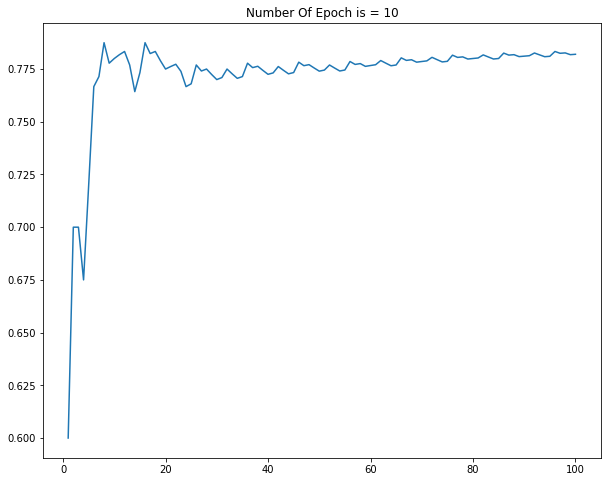

In [569]:
plt.figure(figsize = (10,8))
plt.plot(np.arange(1,number_of_iteration_m+1),np.array(m_batch_acc_scores))
plt.title("Number Of Epoch is = %i"% (epoch));

## QUESTION 5

In [570]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [571]:
print("Bias term(W0) of linear regression: %.2f" % (lin_reg.intercept_))

print("W1 of linear regression: %.2f" % (lin_reg.coef_[0]))
print("W2 of linear regression: %.2f" % (lin_reg.coef_[1]))

Bias term(W0) of linear regression: 0.06
W1 of linear regression: 0.27
W2 of linear regression: -0.02


In [576]:
print("Bias term(W0) of sequential mode: %.2f" % (seq_w_[0]))

print("W1 of sequential mode: %.2f" % (seq_w_[1]))
print("W2 of sequential mode: %.2f" % (seq_w_[2]))

Bias term(W0) of sequential mode: 0.33
W1 of sequential mode: 0.27
W2 of sequential mode: -0.01


In [577]:
print("Bias term(W0) of batch mode: %.2f" % (batch_w_[0][0]))

print("W1 of batch mode: %.2f" % (batch_w_[1][0]))
print("W2 of batch mode: %.2f" % (batch_w_[2][0]))

Bias term(W0) of batch mode: 0.03
W1 of batch mode: 0.08
W2 of batch mode: -0.04


In [578]:
print("Bias term(W0) of mini batch mode: %.2f" % (m_batch_w_[0][0]))

print("W1 of mini batch mode: %.2f" % (m_batch_w_[1][0]))
print("W2 of mini batch mode: %.2f" % (m_batch_w_[2][0]))

Bias term(W0) of mini batch mode: 0.02
W1 of mini batch mode: 0.34
W2 of mini batch mode: 0.25
